# ID check
- Sample swap, contamination. Called SNP from STAR-aligned BAM, and merged with imputed geontype, then ran `plink --genome` (or `plink --genome-full`) (Mike)
- Note: In BAM, 1707 is HDBR. In genotype, 1707 walker, 1707.1 HDBR
- First get rows with either IID1 or IID2 is from BAM-called genotype, but not both
- Then identify rows from the same subject
- There are 14 subjects with pi_hat > 0.5 with other subjects. 12 of these are already identified as related subjects (genotype only pi_hat > 0.3), and were removed in QTL mapping. Not in rel: HSB430-HSB289.BAM, from Werling, passed verifyBamID FREEMIX, didn't check CHIPMIX. PI_HAT 0.5643
- Subjects with pi_hat > 0.9 with other subjects are all in rel and removed

In [1]:
library(data.table)
library(tidyverse)

setwd("~/project-gandalm/isoform_twas/checkid/")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()



In [2]:
dat <- fread("plink.genome.tsv", data.table = F)
head(dat)
# 849 and 849.STARAligned.sortedByCoord.WASPfiltered.out.bam
# imputed genotype and BAM-called genotype
# pairs like this have high pi_hat (overall share of IBD)
# 653*2 = 1306
length(unique(dat$IID1))
length(unique(dat$IID2))

,V1,FID1,IID1,FID2,IID2,RT,EZ,Z0,Z1,Z2,PI_HAT,PHE,DST,PPC,RATIO,IBS0,IBS1,IBS2,HOMHOM,HETHET
,<lgl>,<int>,<chr>,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
1,NA,0,849,0,898,OT,0,1,0,0,0,-1,0.669042,0.0000,1.1772,325,1486,1416,254,299
2,NA,0,849,0,1038,OT,0,1,0,0,0,-1,0.669197,0.0000,1.1152,360,1415,1452,269,300
3,NA,0,849,0,1039,OT,0,1,0,0,0,-1,0.698791,0.0046,1.5874,267,1410,1550,206,327
4,NA,0,849,0,1046,OT,0,1,0,0,0,-1,0.670282,0.0000,1.1719,337,1454,1436,256,300
5,NA,0,849,0,1092,OT,0,1,0,0,0,-1,0.673691,0.0000,1.3125,320,1466,1441,240,315
6,NA,0,849,0,1102,OT,0,1,0,0,0,-1,0.671057,0.0000,1.2109,347,1429,1451,256,310


[1] 1306

[1] 1306

In [6]:
dat %>% filter(IID1 == "HSB430", IID2 == "HSB430.STARAligned.sortedByCoord.WASPfiltered.out.bam")
dat %>% filter(IID1 == "HSB289", IID2 == "HSB289.STARAligned.sortedByCoord.WASPfiltered.out.bam")
dat %>% filter(IID1 == "HSB430", IID2 == "HSB289.STARAligned.sortedByCoord.WASPfiltered.out.bam")
dat %>% filter(IID1 == "HSB289", IID2 == "HSB430.STARAligned.sortedByCoord.WASPfiltered.out.bam")

V1,FID1,IID1,FID2,IID2,RT,EZ,Z0,Z1,Z2,PI_HAT,PHE,DST,PPC,RATIO,IBS0,IBS1,IBS2,HOMHOM,HETHET
<lgl>,<int>,<chr>,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
NA,0,HSB430,0,HSB430.STARAligned.sortedByCoord.WASPfiltered.out.bam,OT,0,0,0.0715,0.9285,0.9642,-1,0.986194,1,NA,0,88,3099,0,804


V1,FID1,IID1,FID2,IID2,RT,EZ,Z0,Z1,Z2,PI_HAT,PHE,DST,PPC,RATIO,IBS0,IBS1,IBS2,HOMHOM,HETHET
<lgl>,<int>,<chr>,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
NA,0,HSB289,0,HSB289.STARAligned.sortedByCoord.WASPfiltered.out.bam,OT,0,0.3125,0.6875,0,0.3437,-1,0.708752,1,6.5059,100,1657,1431,85,553


V1,FID1,IID1,FID2,IID2,RT,EZ,Z0,Z1,Z2,PI_HAT,PHE,DST,PPC,RATIO,IBS0,IBS1,IBS2,HOMHOM,HETHET
<lgl>,<int>,<chr>,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
NA,0,HSB430,0,HSB289.STARAligned.sortedByCoord.WASPfiltered.out.bam,OT,0,0.0717,0.728,0.2003,0.5643,-1,0.837516,1,59,18,1000,2170,13,767


V1,FID1,IID1,FID2,IID2,RT,EZ,Z0,Z1,Z2,PI_HAT,PHE,DST,PPC,RATIO,IBS0,IBS1,IBS2,HOMHOM,HETHET
<lgl>,<int>,<chr>,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
NA,0,HSB289,0,HSB430.STARAligned.sortedByCoord.WASPfiltered.out.bam,OT,0,1,0,0,0,-1,0.692501,0.1457,1.8205,257,1446,1484,195,355


In [3]:
dat <- dat %>% filter(!(IID1 == "1707" | IID2 == "1707" | IID1 == "1707.1" | IID2 == "1707.1" |
                       IID1 == "1707.STARAligned.sortedByCoord.WASPfiltered.out.bam" |
                       IID2 == "1707.STARAligned.sortedByCoord.WASPfiltered.out.bam"))
dat %>% filter(str_detect(IID1, "1707"), str_detect(IID2, "1707"))

V1,FID1,IID1,FID2,IID2,RT,EZ,Z0,Z1,Z2,PI_HAT,PHE,DST,PPC,RATIO,IBS0,IBS1,IBS2,HOMHOM,HETHET
<lgl>,<int>,<chr>,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
NA,0,17071,0,17072,OT,0,1,0.0000,0.0000,0.0000,-1,0.706229,0.8955,2.2376,261,1374,1592,181,405
NA,0,17071,0,17071.STARAligned.sortedByCoord.WASPfiltered.out.bam,OT,0,0,0.0347,0.9653,0.9826,-1,0.993296,1.0000,NA,0,43,3164,0,807
NA,0,17071,0,17072.STARAligned.sortedByCoord.WASPfiltered.out.bam,OT,0,1,0.0000,0.0000,0.0000,-1,0.701434,0.4651,1.9847,272,1371,1564,196,389
NA,0,17072,0,17071.STARAligned.sortedByCoord.WASPfiltered.out.bam,OT,0,1,0.0000,0.0000,0.0000,-1,0.704241,0.7945,2.1522,265,1367,1575,184,396
NA,0,17072,0,17072.STARAligned.sortedByCoord.WASPfiltered.out.bam,OT,0,0,0.0477,0.9523,0.9762,-1,0.990801,1.0000,NA,0,59,3148,0,812
NA,0,17071.STARAligned.sortedByCoord.WASPfiltered.out.bam,0,17072.STARAligned.sortedByCoord.WASPfiltered.out.bam,OT,0,1,0.0000,0.0000,0.0000,-1,0.701097,0.3309,1.9254,279,1349,1562,201,387


In [4]:
# To check sample swaps, keep pairs with one BAM-called genotype
bam_1 <- dat %>% filter(str_detect(IID1, "STAR"))
bam_2 <- dat %>% filter(str_detect(IID2, "STAR"))

In [5]:
bam_12 <- rbind(bam_1, bam_2)
dim(bam_12)
bam_12 <- bam_12[!duplicated(bam_12),]
dim(bam_12)

[1] 849556     20

[1] 637330     20

In [6]:
bam_12 <- bam_12 %>% filter(!(str_detect(IID1, "STAR") & str_detect(IID2, "STAR")))

In [7]:
dim(bam_12)
head(bam_12)

[1] 425104     20

,V1,FID1,IID1,FID2,IID2,RT,EZ,Z0,Z1,Z2,PI_HAT,PHE,DST,PPC,RATIO,IBS0,IBS1,IBS2,HOMHOM,HETHET
,<lgl>,<int>,<chr>,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
1,NA,0,849,0,1038.STARAligned.sortedByCoord.WASPfiltered.out.bam,OT,0,1,0,0,0,-1,0.654525,0,0.9555,398,1357,1361,292,279
2,NA,0,849,0,1039.STARAligned.sortedByCoord.WASPfiltered.out.bam,OT,0,1,0,0,0,-1,0.683635,0,1.2265,305,1385,1463,234,287
3,NA,0,849,0,1046.STARAligned.sortedByCoord.WASPfiltered.out.bam,OT,0,1,0,0,0,-1,0.655769,0,1.0000,358,1474,1349,270,270
4,NA,0,849,0,1092.STARAligned.sortedByCoord.WASPfiltered.out.bam,OT,0,1,0,0,0,-1,0.653693,0,0.7868,349,1215,1198,272,214
5,NA,0,849,0,1102.STARAligned.sortedByCoord.WASPfiltered.out.bam,OT,0,1,0,0,0,-1,0.660125,0,1.0605,377,1428,1405,281,298
6,NA,0,849,0,1107.STARAligned.sortedByCoord.WASPfiltered.out.bam,OT,0,1,0,0,0,-1,0.660082,0,1.0830,394,1380,1415,289,313


In [8]:
range(bam_12$PI_HAT)

[1] 0.000 0.998

In [9]:
# Now identify rows from the same subject
bam_12 <- bam_12 %>% 
    separate(IID1, sep='[.]', into = c("subj1", "c1", "c2", "c3", "c4", "c5"), remove = FALSE) %>%
    separate(IID2, sep='[.]', into = c("subj2", "d1", "d2", "d3", "d4", "d5"), remove = FALSE)

Warning message:
“Expected 6 pieces. Missing pieces filled with `NA` in 425104 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


In [10]:
head(bam_12 %>% select(IID1, subj1, IID2, subj2))

,IID1,subj1,IID2,subj2
,<chr>,<chr>,<chr>,<chr>
1,849,849,1038.STARAligned.sortedByCoord.WASPfiltered.out.bam,1038
2,849,849,1039.STARAligned.sortedByCoord.WASPfiltered.out.bam,1039
3,849,849,1046.STARAligned.sortedByCoord.WASPfiltered.out.bam,1046
4,849,849,1092.STARAligned.sortedByCoord.WASPfiltered.out.bam,1092
5,849,849,1102.STARAligned.sortedByCoord.WASPfiltered.out.bam,1102
6,849,849,1107.STARAligned.sortedByCoord.WASPfiltered.out.bam,1107


In [11]:
bam_12 <- bam_12 %>% mutate(same = (subj1 == subj2))

In [12]:
table(bam_12$same)


 FALSE   TRUE 
424452    652 

In [15]:
# colors <- c("FALSE" = "#3B9AB2", "TRUE" = "#E1AF00")

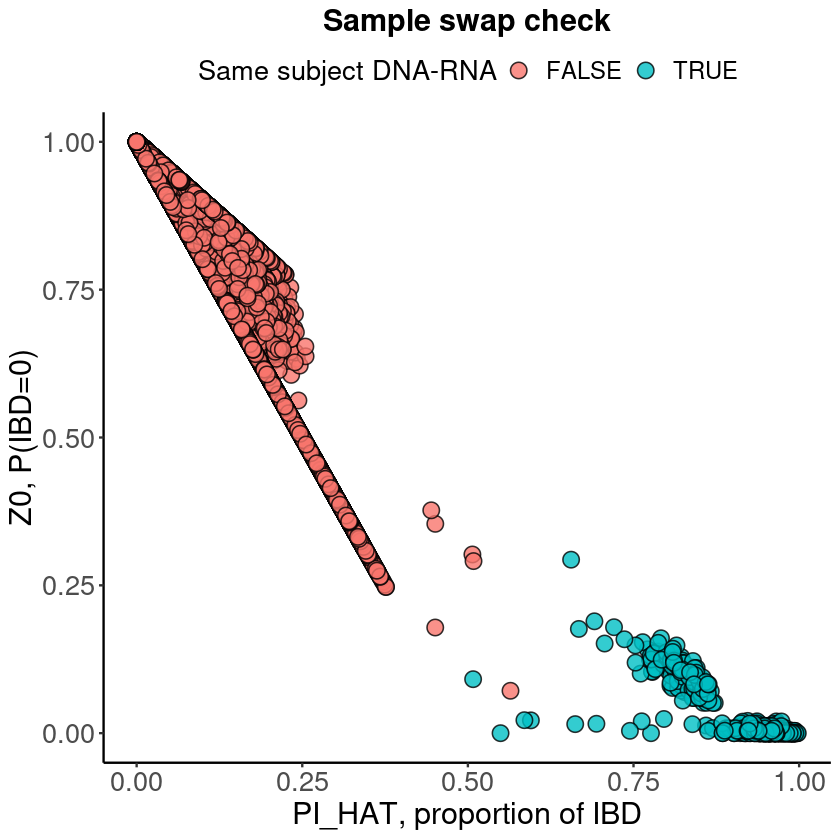

In [23]:
ggplot(bam_12, aes(x = PI_HAT, y = Z0, fill = same)) +
    geom_point(size = 4, shape = 21, alpha = 0.8) +
    labs(title = "Sample swap check", x = "PI_HAT, proportion of IBD", y = "Z0, P(IBD=0)", 
         fill = "Same subject DNA-RNA") +
    theme_classic() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14),
          legend.position = "top") 
#     geom_vline(xintercept = 0.3, linetype = "dashed", color = "grey")
#     scale_color_manual(values = colors)
#     scale_color_brewer(palette = "Dark2")

In [24]:
ggsave("check.pdf", width = 6, height = 6)

In [79]:
temp <- bam_12 %>% filter(same == FALSE, PI_HAT > 0.5) %>% select(IID1, IID2, subj1, subj2)
temp

IID1,IID2,subj1,subj2
<chr>,<chr>,<chr>,<chr>
1614,1713.STARAligned.sortedByCoord.WASPfiltered.out.bam,1614,1713
1713,1614.STARAligned.sortedByCoord.WASPfiltered.out.bam,1713,1614
Br1779,Br1794.STARAligned.sortedByCoord.WASPfiltered.out.bam,Br1779,Br1794
Br2394,HSB148.STARAligned.sortedByCoord.WASPfiltered.out.bam,Br2394,HSB148
Br2402,HSB107.STARAligned.sortedByCoord.WASPfiltered.out.bam,Br2402,HSB107
Br2411,HSB154.STARAligned.sortedByCoord.WASPfiltered.out.bam,Br2411,HSB154
Br2412,HSB100.STARAligned.sortedByCoord.WASPfiltered.out.bam,Br2412,HSB100
HSB100,Br2412.STARAligned.sortedByCoord.WASPfiltered.out.bam,HSB100,Br2412
HSB107,Br2402.STARAligned.sortedByCoord.WASPfiltered.out.bam,HSB107,Br2402


In [82]:
vec <- c(temp$subj1, temp$subj2)
vec
vec_unique <- unique(vec)
vec_unique

[1] "1614"   "1713"   "Br1779" "Br2394" "Br2402" "Br2411" "Br2412" "HSB100"
 [9] "HSB107" "HSB148" "HSB154" "HSB430" "1713"   "1614"   "Br1794" "HSB148"
[17] "HSB107" "HSB154" "HSB100" "Br2412" "Br2402" "Br2394" "Br2411" "HSB289"

[1] "1614"   "1713"   "Br1779" "Br2394" "Br2402" "Br2411" "Br2412" "HSB100"
 [9] "HSB107" "HSB148" "HSB154" "HSB430" "Br1794" "HSB289"

In [84]:
rel <- read.table("../genotype/all_data/isec_R2_greater_than_3/ancestry/related.txt", header = F, stringsAsFactors = F)$V1
sum(vec_unique %in% rel)
sum(rel %in% vec_unique)
length(vec_unique)
length(rel)

[1] 12

[1] 12

[1] 14

[1] 14

In [13]:
bam_12 %>% filter(same == FALSE, PI_HAT > 0.9) %>% select(IID1, IID2, subj1, subj2)

IID1,IID2,subj1,subj2
<chr>,<chr>,<chr>,<chr>
Br1779,Br1794.STARAligned.sortedByCoord.WASPfiltered.out.bam,Br1779,Br1794
Br2394,HSB148.STARAligned.sortedByCoord.WASPfiltered.out.bam,Br2394,HSB148
Br2402,HSB107.STARAligned.sortedByCoord.WASPfiltered.out.bam,Br2402,HSB107
Br2411,HSB154.STARAligned.sortedByCoord.WASPfiltered.out.bam,Br2411,HSB154
Br2412,HSB100.STARAligned.sortedByCoord.WASPfiltered.out.bam,Br2412,HSB100
HSB100,Br2412.STARAligned.sortedByCoord.WASPfiltered.out.bam,HSB100,Br2412
HSB107,Br2402.STARAligned.sortedByCoord.WASPfiltered.out.bam,HSB107,Br2402
HSB148,Br2394.STARAligned.sortedByCoord.WASPfiltered.out.bam,HSB148,Br2394
HSB154,Br2411.STARAligned.sortedByCoord.WASPfiltered.out.bam,HSB154,Br2411
